In [1]:
from marubatsu import Marubatsu

mb = Marubatsu()
mb.move(0, 1)
mb.move(1, 1)
mb.move(1, 0)
print(mb)
print(mb.records)

Turn x
.O.
ox.
...

[None, (0, 1), (1, 1), (1, 0)]


In [2]:
from tree import Mbtree

def ai_gt1(mb, mbtree):
    node = mbtree.root
    for move in mb.records[1:]:
        node = node.children_by_move[move]
    return node

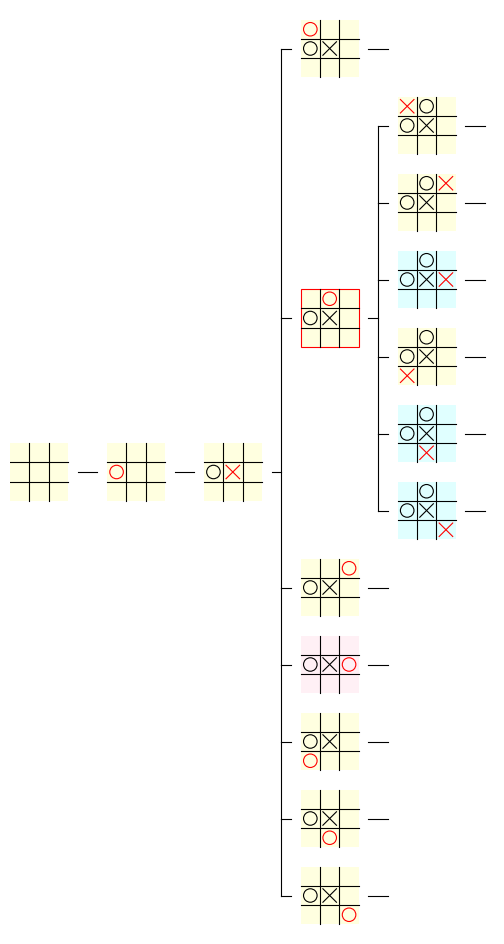

In [3]:
mbtree = Mbtree.load("dfscore")
node = ai_gt1(mb, mbtree)
mbtree.draw_subtree(centernode=node, selectednode=node, maxdepth=node.depth + 1)

In [4]:
def ai_gt1(mb, mbtree):
    node = mbtree.root
    for move in mb.records[1:]:
        node = node.children_by_move[move]

    bestmoves = []
    for move, childnode in node.children_by_move.items():
        if node.score == childnode.score:
            bestmoves.append(move)
    return bestmoves

In [5]:
print(ai_gt1(mb, mbtree))

[(0, 0), (2, 0), (0, 2)]


In [6]:
from random import choice

def ai_gt1(mb, mbtree):
    node = mbtree.root
    for move in mb.records[1:]:
        node = node.children_by_move[move]

    bestmoves = []
    for move, childnode in node.children_by_move.items():
        if node.score == childnode.score:
            bestmoves.append(move)
    return choice(bestmoves)

In [7]:
for i in range(10):
    print(ai_gt1(mb, mbtree))

(2, 0)
(0, 0)
(2, 0)
(0, 2)
(2, 0)
(2, 0)
(2, 0)
(2, 0)
(0, 2)
(2, 0)


In [8]:
from ai import ai2s, ai_match

ai_match(ai=[ai_gt1, ai2s], params=[{"mbtree": mbtree}, {}])

ai_gt1 VS ai2s


TypeError: ai_gt1() missing 1 required positional argument: 'mbtree'

In [9]:
mb = Marubatsu()
ai=[ai_gt1, ai2s]
params=[{"mbtree": mbtree}, {}]
print(ai[0](mb, **params[0]))

(2, 2)


In [10]:
from collections import defaultdict

def ai_match(ai, params=[{}, {}], match_num:int=10000):
    print(f"{ai[0].__name__} VS {ai[1].__name__}")
    
    mb = Marubatsu()

    # ai[0] VS ai[1] と ai[1] VS a[0] の対戦を match_num 回行い、通算成績を数える
    count_list = [ defaultdict(int), defaultdict(int)]
    for _ in range(match_num):
        count_list[0][mb.play(ai, params=params, verbose=False)] += 1
        count_list[1][mb.play(ai=ai[::-1], params=params[::-1], verbose=False)] += 1

    # ai[0] から見た通算成績を計算する
    count_list_ai0 = [
        # ai[0] VS ai[1] の場合の、ai[0] から見た通算成績
        { 
            "win": count_list[0][Marubatsu.CIRCLE],
            "lose": count_list[0][Marubatsu.CROSS],
            "draw": count_list[0][Marubatsu.DRAW],
        },
        # ai[1] VS ai[0] の場合の、ai[0] から見た通算成績
        { 
            "win": count_list[1][Marubatsu.CROSS],
            "lose": count_list[1][Marubatsu.CIRCLE],
            "draw": count_list[1][Marubatsu.DRAW],
        },
    ]           

    # 両方の対戦の通算成績の合計を計算する
    count_list_ai0.append({})
    for key in count_list_ai0[0]:
        count_list_ai0[2][key] = count_list_ai0[0][key] + count_list_ai0[1][key]

    # それぞれの比率を計算し、ratio_list に代入する
    ratio_list = [ {}, {}, {} ]
    for i in range(3):
        for key in count_list_ai0[i]:
            ratio_list[i][key] = count_list_ai0[i][key] / sum(count_list_ai0[i].values())
            
    # 各行の先頭に表示する文字列のリスト
    item_text_list = [ Marubatsu.CIRCLE, Marubatsu.CROSS, "total" ]    
    
    # 通算成績の回数と比率の表示
    width = max(len(str(match_num * 2)), 7)
    diff_list = [ ("count", count_list_ai0, f"{width}d"),
                  ("ratio", ratio_list, f"{width}.1%") ]
    for title, data, format in diff_list:
        print(title, end="")
        for key in data[0]:
            print(f" {key:>{width}}", end="")
        print()
        for i in range(3):
            print(f"{item_text_list[i]:5}", end="")
            for value in data[i].values():
                print(f" {value:{format}}", end="")
            print()
        print()

In [11]:
ai_match(ai=[ai_gt1, ai2s], params=[{"mbtree": mbtree}, {}])

ai_gt1 VS ai2s


KeyboardInterrupt: 

In [12]:
ai_match(ai=[ai2s, ai2s])

ai2s VS ai2s
count     win    lose    draw
o        5829    2909    1262
x        2927    5851    1222
total    8756    8760    2484

ratio     win    lose    draw
o       58.3%   29.1%   12.6%
x       29.3%   58.5%   12.2%
total   43.8%   43.8%   12.4%



In [19]:
from marubatsu import Marubatsu_GUI
import random

def play(self, ai, ai_dict=None, params=None, verbose=True, seed=None, gui=False, size=3):
    # params が None の場合のデフォルト値を設定する
    if params is None:
        params = [{}, {}]
        
    # 一部の仮引数をインスタンスの属性に代入する
    self.ai = ai
    self.verbose = verbose
    self.gui = gui
    
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)

    # gui が True の場合に、GUI の処理を行う Marubatsu_GUI のインスタンスを作成する
    if gui:
        mb_gui = Marubatsu_GUI(self, ai_dict=ai_dict, seed=seed, size=size)  
    else:
        mb_gui = None
        
    self.restart()
    return self.play_loop(mb_gui, params=params)

Marubatsu.play = play

In [20]:
def play_loop(self, mb_gui, params=None):
    if params is None:
        params = [{}, {}]

    ai = self.ai
    verbose = self.verbose
    gui = self.gui
    
    # ゲームの決着がついていない間繰り返す
    while self.status == Marubatsu.PLAYING:
        # 現在の手番を表す ai のインデックスを計算する
        index = 0 if self.turn == Marubatsu.CIRCLE else 1
        # ゲーム盤の表示
        if verbose:
            if gui:
                # AI どうしの対戦の場合は画面を描画しない
                if ai[0] is None or ai[1] is None:
                    mb_gui.update_gui()
                # 手番を人間が担当する場合は、play メソッドを終了する
                if ai[index] is None:
                    return
            else:
                print(self)
                
        # ai が着手を行うかどうかを判定する
        if ai[index] is not None:
            x, y = ai[index](self, **params[index])
        else:
            # キーボードからの座標の入力
            coord = input("x,y の形式で座標を入力して下さい。exit を入力すると終了します")
            # "exit" が入力されていればメッセージを表示して関数を終了する
            if coord == "exit":
                print("ゲームを終了します")
                return       
            # x 座標と y 座標を要素として持つ list を計算する
            xylist = coord.split(",")
            # xylist の要素の数が 2 ではない場合
            if len(xylist) != 2:
                # エラーメッセージを表示する
                print("x, y の形式ではありません")
                # 残りの while 文のブロックを実行せずに、次の繰り返し処理を行う
                continue
            x, y = xylist
        # (x, y) に着手を行う
        try:
            self.move(int(x), int(y))
        except:
            print("整数の座標を入力して下さい")

    # 決着がついたので、ゲーム盤を表示する
    if verbose:
        if gui:
            mb_gui.update_gui()
        else:
            print(self)
            
    return self.status

Marubatsu.play_loop = play_loop

In [21]:
ai_match(ai=[ai_gt1, ai2s], params=[{"mbtree": mbtree}, {}])

ai_gt1 VS ai2s
count     win    lose    draw
o        9690       0     310
x        7795       0    2205
total   17485       0    2515

ratio     win    lose    draw
o       96.9%    0.0%    3.1%
x       78.0%    0.0%   22.1%
total   87.4%    0.0%   12.6%



In [22]:
from ai import ai14s

ai_match(ai=[ai_gt1, ai14s], params=[{"mbtree": mbtree}, {}])

ai_gt1 VS ai14s
count     win    lose    draw
o           0       0   10000
x           0       0   10000
total       0       0   20000

ratio     win    lose    draw
o        0.0%    0.0%  100.0%
x        0.0%    0.0%  100.0%
total    0.0%    0.0%  100.0%

